## CS105 Mini-Project
Worked in by:

**Kevin Chin, Muhammad Memon, Zain Ashraf, Zian Ibrahim**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("sample_data.csv")
cleaned_df = df.loc[:, ['What is your current class standing?', 'What is your gender?', 'Do you currently have a job?', 
                    'If you have a job, how much do you work per week?', 
                    'If you have a job, do you work on or off campus?', 
                    'What is your GPA?', 
                    'How satisfied are you with your current GPA?',
                    'How many classes are you taking this quarter?', 
                    'How many hours per week do you typically spend studying/preparing for class (reading ahead, homework, general studying, etc.)?']]
cleaned_df.loc[:, 'Do you currently have a job?'] = cleaned_df.loc[:, 'Do you currently have a job?'].fillna(0)
cleaned_df.loc[:, 'If you have a job, how much do you work per week?'] = cleaned_df.loc[:, 'If you have a job, how much do you work per week?'].fillna(0)
cleaned_df.loc[:, 'If you have a job, do you work on or off campus?'] = cleaned_df.loc[:, 'If you have a job, do you work on or off campus?'].fillna(0)
cleaned_df.head()

,What is your current class standing?,What is your gender?,Do you currently have a job?,"If you have a job, how much do you work per week?","If you have a job, do you work on or off campus?",What is your GPA?,How satisfied are you with your current GPA?,How many classes are you taking this quarter?,"How many hours per week do you typically spend studying/preparing for class (reading ahead, homework, general studying, etc.)?"
0,Senior,Male,No,0,0,3.0-3.5,4.0,4,10-20 hours per week
1,Junior,Male,No,0,0,3.0-3.5,3.0,4,5-10 hours per week
2,Senior,Female,Yes,Between 5-10 hours,Off campus,3.5-4.0,5.0,4,10-20 hours per week
3,Junior,Male,Yes,Between 5-10 hours,Off campus,3.5-4.0,5.0,3,5-10 hours per week
4,Senior,Male,No,0,0,2.5-3.0,3.0,4,10-20 hours per week


## 1. What we are Analyzing

The data we have for this analysis is some general information about the students. For example, we have their class standing, gender, GPA, how satisfied they are with their GPA, how much time they spend studying for classes, and the number of classes they are taking this quarter. 

We also have data in regards to them having a job. For example, we have data on whether they have a job or not, if they work on campus or off campus, and an estimate of how many hours a week they work. The survey to collect this data was sent out to students in CS105, CS111, CS141, and was cleaned/filtered to give data that was relevant to our case study.

## 2. The correlation we are observing

What we are trying to see through this data is the correlation between having a job and how well a student performs in school, by looking at things like their GPA, how many hours they put into studying, and more. We will examine and analyze the data using several factors to see the correlation. 

## 3.1 Relationship between Genders and Jobs

<Axes: xlabel='What is your gender?'>

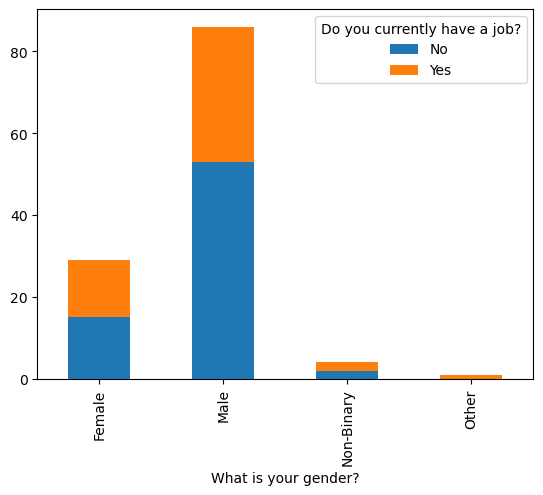

In [2]:
genderGroupingTable = pd.crosstab(cleaned_df['What is your gender?'], cleaned_df['Do you currently have a job?'])
genderGroupingTable.plot.bar(stacked = True)

For this analysis, we will simply count the number of individuals from each gender who have a job and those who don't. We will then display it in a stacked bar graph to see an accurate representation of each gender’s job situation.

In this data, we noticed that an equal proportion of male and female students who participated in this survey have a job. Through this, we also noticed that there were more men than women who responded, which is expected as the classes in which this poll was conducted have typically more men than women. Although there are people who are non-binary or are part of another gender, they are a relatively small percentage so examining them individually as we have done with men and women would not entail much findings.

## 3.2 Students GPA in Relation to Job

Text(0, 0.5, 'GPA')

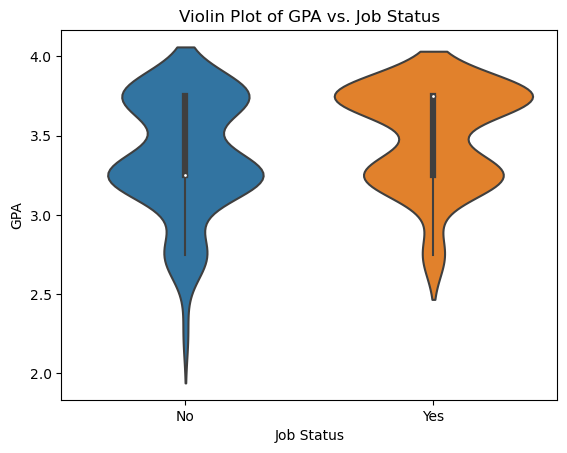

In [3]:
newTable = cleaned_df.loc[:, ['What is your GPA?', 'Do you currently have a job?']]
newTable = newTable[newTable['Do you currently have a job?'] != 0]

newTable = newTable.replace({
    'What is your GPA?': {'3.5-4.0': 3.75, '3.0-3.5': 3.25, '2.5-3.0': 2.75, '2.0-2.5': 2.25, '<2.0': 1.5}
})


sns.violinplot(y = newTable['What is your GPA?'], x = newTable['Do you currently have a job?'])

plt.title('Violin Plot of GPA vs. Job Status')
plt.xlabel('Job Status')
plt.ylabel('GPA')

A violin plot was used to demonstrate the relationship between a student's GPA and if the student has a job. 

According to the plot above, students with a job have higher GPA than students with no jobs. There is a higher density plot around 3.75 for students with jobs. Students with a job have a higher median than students with no job. Students with no job have a median of 3.25 while students with a job have a median of 3.75. There are outliers for students with no jobs since the lowest GPA of a student is around 2.0. The lowest GPA for students with jobs is 2.5. 

## 3.3 Relationship between having a job and their satisfaction of GPA

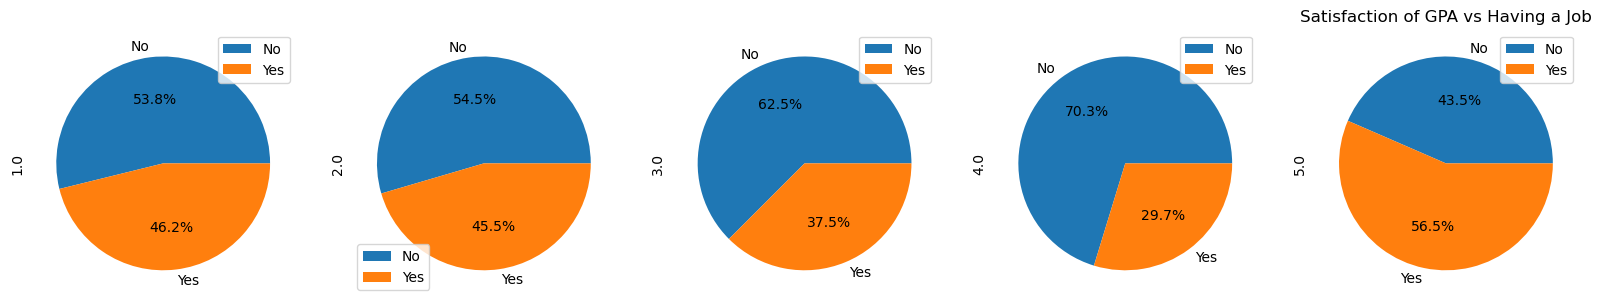

In [4]:
Job_SGPA_Pie = pd.crosstab(cleaned_df['Do you currently have a job?'], cleaned_df['How satisfied are you with your current GPA?'])
Job_SGPA_Pie.plot.pie(subplots=True, autopct='%1.1f%%', figsize=(20, 20))

plt.title('Satisfaction of GPA vs Having a Job')
plt.show()

A pie chart was created to represent the proportions between having a Job and their satisfaction with GPA. The "satisfaction of GPA" options ranged from 1 to 5, with 1 being least satisfied and 5 being most satisfied. I assigned each satisfaction option to a pie chart. 

According to the pie charts above, 56.5% of students who are most satisfied with their GPA have a job. On the other hand, 53.8% of students who are unsatisfied with their GPA do not have jobs. 

After analyzing all the pie charts, students with a job are more satisfied with their current GPA. In contrast, students with no jobs are generally not satisfied with their GPA. 

## 3.4 Relationship between the amount of hours an individual works, the amount they study and their GPA

Text(0.5, 0, 'GPA')

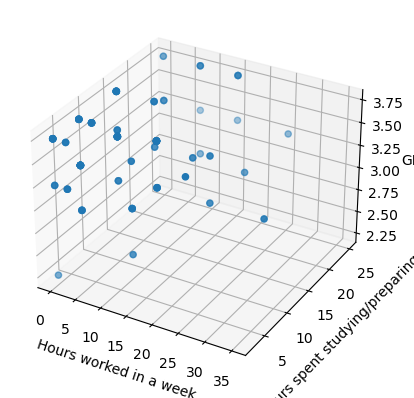

In [5]:
work_study_gpa_table = cleaned_df.loc[:, ['How many hours per week do you typically spend studying/preparing for class (reading ahead, homework, general studying, etc.)?', 
                                           'What is your GPA?', 
                                           'If you have a job, how much do you work per week?'
                                          ]]
work_study_gpa_table = work_study_gpa_table.replace({
    'What is your GPA?': {'3.5-4.0': 3.75, '3.0-3.5': 3.25, '2.5-3.0': 2.75, '2.0-2.5': 2.25, '<2.0': 1.5},
    'If you have a job, how much do you work per week?': {'Less than 5 hours': 2.5, 'Between 5-10 hours': 7.5, 'Between 10-20 hours': 15, 'Between 20-30 hours': 25, '30+ hours': 35},
    'How many hours per week do you typically spend studying/preparing for class (reading ahead, homework, general studying, etc.)?': {'Less than 5 hours per week': 2.5, '5-10 hours per week': 7.5, '10-20 hours per week': 15, '20+ hours per week': 25},
})

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(work_study_gpa_table['If you have a job, how much do you work per week?'], work_study_gpa_table['How many hours per week do you typically spend studying/preparing for class (reading ahead, homework, general studying, etc.)?'], work_study_gpa_table['What is your GPA?'])
ax.set_xlabel('Hours worked in a week')
ax.set_ylabel('Hours spent studying/preparing')
ax.set_zlabel('GPA')

Text(0, 0.5, 'GPA')

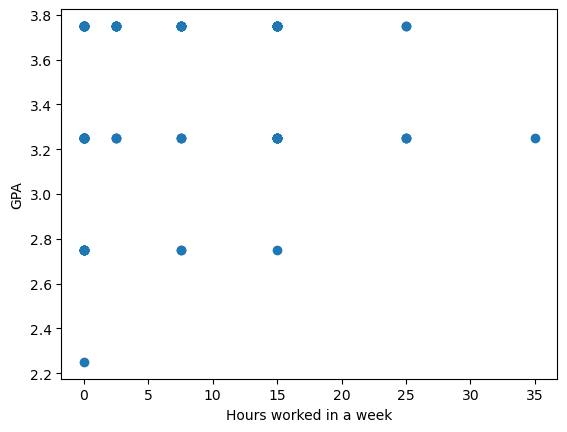

In [6]:
plt.scatter(work_study_gpa_table['If you have a job, how much do you work per week?'], work_study_gpa_table['What is your GPA?'])
plt.xlabel('Hours worked in a week')
plt.ylabel('GPA')

Text(0, 0.5, 'GPA')

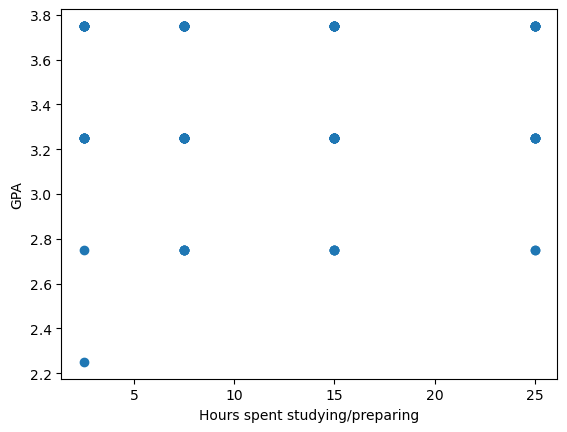

In [7]:
plt.scatter(work_study_gpa_table['How many hours per week do you typically spend studying/preparing for class (reading ahead, homework, general studying, etc.)?'], work_study_gpa_table['What is your GPA?'])
plt.xlabel('Hours spent studying/preparing')
plt.ylabel('GPA')

For this analysis, we look at 3 variables: a student’s GPA, the hours they work per week, and the hours they study per week. We look at the correlation between the three variables. 

**Correlation between hours spent studying and GPA**
We notice that the correlation between the hours a student studies and their GPA is insignificant. In our data, we see no linear relationship between hours spent studying and a student’s GPA. The GPA of students scattered is practically the same no matter how much time they spend studying. This implies that other factors may be at play.

**Correlation between hours spent studying and GPA**
We also notice that the correlation between the hours a student works and the hours they spend studying is also not as correlated. However, as the number of hours they work reaches the maximum category in our survey, the students do not report having the largest possible GPA. This suggests that the number of hours a student works does not impact their GPA significantly.

## 3.5 Relationship between GPA of working on campus and off campus

     What is your GPA? If you have a job, do you work on or off campus?
2                 3.75                                       Off campus
3                 3.75                                       Off campus
11                3.25                                        On campus
13                3.75                                        On campus
16                3.75                                        On campus
18                3.25                                       Off campus
22                3.25                                       Off campus
23                3.75                                        On campus
28                3.75                                       Off campus
29                3.25                                       Off campus
30                3.25                                       Off campus
31                3.25                                       Off campus
32                3.75                                       Off

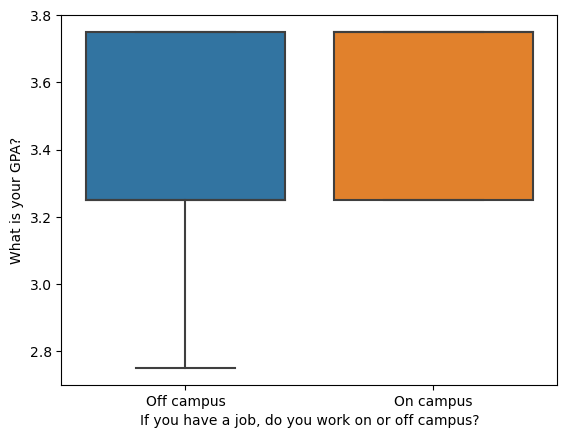

In [8]:
#zain

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have numeric values for GPA
GPA_CampusTable = cleaned_df.loc[:, ['What is your GPA?', 'If you have a job, do you work on or off campus?']]
GPA_CampusTable = GPA_CampusTable.replace({
    'What is your GPA?': {'3.5-4.0': 3.75, '3.0-3.5': 3.25, '2.5-3.0': 2.75, '2.0-2.5': 2.25, '<2.0': 1.5},
    'If you have a job, do you work on or off campus?': {'On Campus': 'On Campus', 'Off Campus': 'Off Campus'}
})

# take out rows with 0's instead of on or off campus and keep all rows that are non nan for GPA
GPA_CampusTable_filtered = GPA_CampusTable[(GPA_CampusTable['If you have a job, do you work on or off campus?'] != 0) & (GPA_CampusTable['What is your GPA?'].notna())]



sns.boxplot(x='If you have a job, do you work on or off campus?', y='What is your GPA?', data=GPA_CampusTable_filtered)

print(GPA_CampusTable_filtered)



In this part of our comparison, we set all of the GPA categories into specific numbers, which accurately represent each category, and filtered all the data to avoid anything that would throw off our comparison. We printed out the filtered data set to see what data we're working with, and put it into a box plot right after. Printing out the filtered data set allowed us to double check the data and ensure that the box plot printed correctly. We used it specificially to track the minimum GPA of students who work off campus vs on campus, and decided to keep it there to better explain our graph. Immediately after printing the box plot, it's easy to tell that students who work off campus have a higher variability in their gpa compared to those who work on campus. The minimum GPA that a student who works off campus has is 2.75, while the minimum GPA that a student who works on campus has is 3.25. When comparing the medians, minimums, interquartile ranges, outliers, and overall spread between the two charts, we can conclude that majority of the data between the two are the same, and the biggest difference is that students who work off campus have a higher variability within their GPA.

## 3.6 Relationship between having a job, amount of classes they take

How many classes are you taking this quarter?  2   3   4  More than 4
Do you currently have a job?                                         
No                                             1  21  46            2
Yes                                            2  24  18            5


<Axes: xlabel='Do you currently have a job?'>

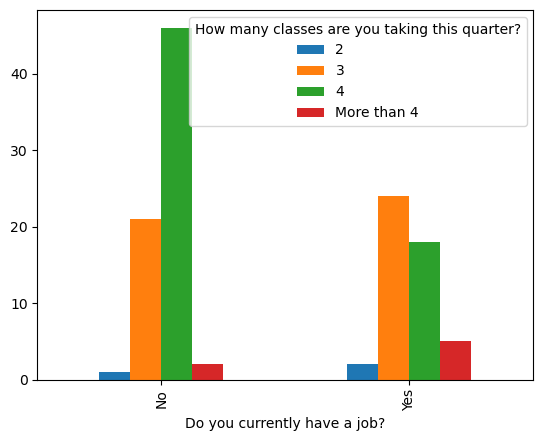

In [9]:
table = pd.crosstab(cleaned_df['Do you currently have a job?'], cleaned_df['How many classes are you taking this quarter?'])
print(table)
table.plot.bar()

In this analysis, we count the number of people that have jobs and how many classes they are taking in the quarter. From this bar chart, we can observe the following:  
The majority of students who do not have a job are taking 4 classes.
For students with a job, the most common number of classes taken is 3.
The number of employed students taking more than 4 classes is low. 
Students without a job taking 2 classes are the fewest.
The count of students taking 4 classes is high for both employed and unemployed students, although it is highest for those without a job.
This suggests that students who are not employed tend to enroll in more classes, particularly 4, while those who are employed tend to take fewer classes, with 3 being the most common. This pattern may reflect the need for employed students to balance work commitments with their academic load.

## 3.7 Relationship between Weekly Work Hours and Study Hours



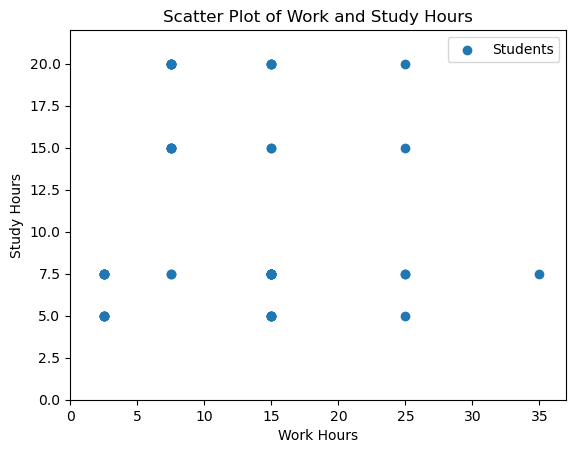

In [10]:
#Zain

import matplotlib.pyplot as plt

workStudyHours = cleaned_df.loc[:, ['If you have a job, how much do you work per week?', 'How many hours per week do you typically spend studying/preparing for class (reading ahead, homework, general studying, etc.)?']]
workStudyHours = workStudyHours.replace({
    'If you have a job, how much do you work per week?': {'Less than 5 hours': 2.5, 'Between 5-10 hours': 7.5, 'Between 10-20 hours': 15, 'Between 20-30 hours': 25, '30+ hours': 35},
    'How many hours per week do you typically spend studying/preparing for class (reading ahead, homework, general studying, etc.)?' : {'Less than 5 hours per week': 5, '5-10 hours per week': 7.5, '10-20 hours per week' : 15, '20+ hours per week' : 20}
})
workStudyHours_filtered = workStudyHours[workStudyHours['If you have a job, how much do you work per week?'] != 0]

work_hours = workStudyHours_filtered['If you have a job, how much do you work per week?']
study_hours = workStudyHours_filtered['How many hours per week do you typically spend studying/preparing for class (reading ahead, homework, general studying, etc.)?']

plt.xlim(0, 37)
plt.ylim(0, 22)
plt.scatter(work_hours, study_hours, label='Students')

plt.xlabel('Work Hours')
plt.ylabel('Study Hours')
plt.title('Scatter Plot of Work and Study Hours')
plt.legend()

plt.show()



In this problem, we converted all the categories of data into specific integers, for them to be read more accurately and easier. We also filtered out any survey responses that would skew the data or throw it off completely. We then threw it into a scatter plot and labeled both the x and y axis.

According to the scatter plot above, the number of hours a student works vs the number of hours a student studies has no correlation. The points on this graph are spread out and dont formulate a linear relationship of any sort. If there was a slow increase throughout the plot, then it would be a positive correlation, and if there was a slow decrease, it would be a negative correlation. But, because the points are so spread out without any pattern, we conclude that it is no correlation.

## 3.8 Relationship between class standing and job impact

If you have a job, how much do you work per week?   0  30+ hours  \
What is your current class standing?                               
Freshman                                            0          0   
Graduate                                            5          0   
Junior                                             29          0   
Senior                                             24          1   
Sophomore                                           8          0   

If you have a job, how much do you work per week?  Between 10-20 hours  \
What is your current class standing?                                     
Freshman                                                             0   
Graduate                                                             5   
Junior                                                               6   
Senior                                                              11   
Sophomore                                                            2   

If y

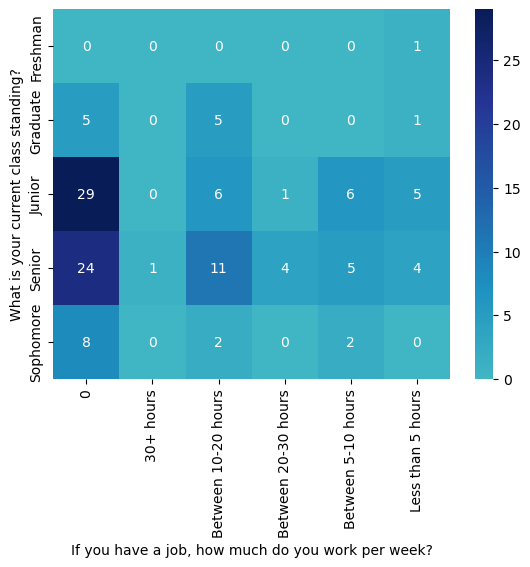

In [11]:
import seaborn as sns
table = pd.crosstab(cleaned_df['What is your current class standing?'], cleaned_df['If you have a job, how much do you work per week?'])
print(table)
sns.heatmap(table, center= 0, cmap = "YlGnBu",annot= True)
plt.show()

The heatmap shows us that there is a significant variation in work hours among students at different academic levels who are employed. It indicates that junior students are the most engaged in work, with a substantial number working 30 or more hours per week, which could be full-time employment. Senior students tend to work part-time, mainly between 10 to 20 hours per week, suggesting they are likely to balance work with their academic responsibilities. Sophomore students show limited work engagement, with very few working significant hours, which may imply a focus on their studies or less necessity or opportunity for work. Graduate students have very little show in the dataset for work hours, with only a single entry for working less than 5 hours per week, showing us a low rate of employment or a focus on academic and potentially university-related work which might not fit into their schedule.

## 4.1 Hypothesis 1

As the number of hours a student works increases, the more their GPA decreases.

To verify this hypothesis we can use a Pearson Correlation Analysis, which tests to see if the 2 variables are correlated or not. It measures how strong of a relationship the two variables have, ranging from a scale of -1 to 1. Numbers closer to -1 are a strong negative correlation, closer to 0 means weak or no correlation, and closer to 1 means strong positive correlation. 


In [12]:
from scipy.stats import chi2_contingency

data = cleaned_df[['If you have a job, how much do you work per week?','What is your GPA?']]

data_filtered = data.replace({
    'What is your GPA?': {'3.5-4.0': 3.75, '3.0-3.5': 3.25, '2.5-3.0': 2.75, '2.0-2.5': 2.25, '<2.0': 1.5},
    'If you have a job, how much do you work per week?': {'Less than 5 hours': 2.5, 'Between 5-10 hours': 7.5, 'Between 10-20 hours': 15, 'Between 20-30 hours': 25, '30+ hours': 35}
})


print('Pearson correlation between two variables:')
print(data_filtered['If you have a job, how much do you work per week?'].corr(data_filtered['What is your GPA?']))

testprint = data_filtered.corr()
testprint

Pearson correlation between two variables:
0.12379921637080332


,"If you have a job, how much do you work per week?",What is your GPA?
"If you have a job, how much do you work per week?",1.000000,0.123799
What is your GPA?,0.123799,1.000000


According to the Pearson Correlation test conducted above, the two variables have a very weak correlation. This is because the correlation is about 0.12, which is very close to 0 but is not close enough to determine it as no correlation. For this reason, we conclude this as a weak correlation. The amount of hours that a student works in a week, compared to their GPA are definitely correlated, but in a very weak manner. We originally expected there to be a much stronger correlation, as the time committment of a job can affect a student's GPA in the long run.

## 4.2 Hypothesis 2
**As the number of hours a student works increases, the amount of time they spend studying decreases.**

The test we are using here is the correlation analysis test. This test finds the correlation coefficient value of the correlation between two valuables. If the correlation coefficient is negative, then it means that the two variables are negatively correlated. If the coefficient is positive, then the variables are positively correlated. If the value is closer to or even equal to 0, then the variables are not correlated or weakly correlated. 

In [13]:
work_study_gpa_table['If you have a job, how much do you work per week?'].corr(work_study_gpa_table['How many hours per week do you typically spend studying/preparing for class (reading ahead, homework, general studying, etc.)?'])

-0.00718985090291666

The outcome of this result was -0.00718 which, if rounded to the nearest hundredth value, would be 0.0. What this suggests is that there is absolutely no correlation between the hours a student works at their job and the amount of time they spend studying/preparing for class. This comes as a complete surprise to us as we expected the number of hours a student spends studying to drastically increase as the number of hours they work decreases. What this also means is that there may be other factors at play when it comes to the amount of time a student spends studying than just the hours they work.

## 4.3 Hypothesis 3

Null Hypothesis: The number of hours a student works is independent from the amount of classes they take this quarter. 

I will use the chi-square to determine if these two variables(number of job hours and amount of classes) are independent or dependent. 

In [14]:
JobHours_NumClass = pd.crosstab(cleaned_df['If you have a job, how much do you work per week?'], cleaned_df['How many classes are you taking this quarter?'])
print(JobHours_NumClass)
print('\n')

# calculate the chi-square value of the dataset
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
chi, p, dfree, expected = chi2_contingency(JobHours_NumClass)
print("calculated chi square value: " ,chi)
print("calculated p value: " ,p)
print("degree of freedom: ", dfree)
print('\n')

print("for 15 degree of freedom, the chi-square value needed to reject the hypothesis at the 0.001 significance level:")
chi2.ppf(0.999, 15)


How many classes are you taking this quarter?      2   3   4  More than 4
If you have a job, how much do you work per week?                        
0                                                  1  18  44            2
30+ hours                                          0   1   0            0
Between 10-20 hours                                1  15   6            2
Between 20-30 hours                                0   2   3            0
Between 5-10 hours                                 1   5   4            3
Less than 5 hours                                  0   4   7            0


calculated chi square value:  25.716012771950275
calculated p value:  0.0411157483809642
degree of freedom:  15


for 15 degree of freedom, the chi-square value needed to reject the hypothesis at the 0.001 significance level:


37.69729821835383

In order to reject the hypothesis at the 0.001 significance level for 15 degrees of freedom, the calculated chi-square will have to be above 37.697. 

Since our chi-square value is 25.72, we accept our null hypothesis because 25.72 < 37.697. The calculated p-value is 0.04 which is greater than 0.001, meaning the null hypothesis should not be rejected. Therefore, the number of hours a student works is independent of the amount of classes they take this quarter. 

## 5. Conclusion

Our conclusion for this research is that having a job does impact a student’s GPA. The impact is positive as students with jobs have a higher GPA and report being more satisfied with it. Other factors that we looked at such as having a job on college campus or off campus, working long hours vs short hours, or even the hours they spend studying/preparing for class do not have an impact on their GPA. However, students with jobs tend to take on small work load but that also does not impact their overall GPA. 